# Monitoramento e Fairness

In [1]:
import pandas as pd
import joblib
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Carregar modelo e vetor já treinados

In [2]:
modelo_path = "../model.joblib"
vetor_path = "../vectorizer.joblib"
dados_path = "../data/tweets_limpo.csv"

if not (os.path.exists(modelo_path) and os.path.exists(vetor_path)):
    raise FileExistsError("Treine e salve o modelo antes de executar!")

model = joblib.load(modelo_path)
vectorizer = joblib.load(vetor_path)
df = pd.read_csv(dados_path)
display(df.head())

,text,label,text_length
0,Adorei o produto de investimentos no mercado d...,positivo,56
1,O serviço de instalação internet foi péssimo. ...,negativo,59
2,Foi ok,neutro,6
3,Entrega rápida com atendimento excelente,positivo,40
4,Não voltarei a comprar,negativo,22


## Monitoramento

In [3]:
novos_textos = [
    "Muito ruim, não gostei do atendimento.",
    "A entrega foi sensacional!",
    "Não funcionou, me decepcionei",
    "Recomendo para todos, nota 10!",
    "Recomendo para todos, top!"
]

novos_df = pd.DataFrame({'text': novos_textos})
display(novos_df)

,text
0,"Muito ruim, não gostei do atendimento."
1,A entrega foi sensacional!
2,"Não funcionou, me decepcionei"
3,"Recomendo para todos, nota 10!"
4,"Recomendo para todos, top!"


In [4]:
novos_vetores = vectorizer.transform(novos_df["text"])
novos_preds = model.predict(novos_vetores)
novos_df['sentimento_predito'] = novos_preds
display(novos_df)

,text,sentimento_predito
0,"Muito ruim, não gostei do atendimento.",negativo
1,A entrega foi sensacional!,positivo
2,"Não funcionou, me decepcionei",negativo
3,"Recomendo para todos, nota 10!",positivo
4,"Recomendo para todos, top!",negativo


In [5]:
class_dict = novos_df["sentimento_predito"].value_counts(normalize=True)
print("Distribuição dos sentimentos preditos no novos dados:")
print(class_dict)

Distribuição dos sentimentos preditos no novos dados:
sentimento_predito
negativo    0.6
positivo    0.4
Name: proportion, dtype: float64


## Fairness - Vieses

In [6]:
df["text_len"]= df["text"].apply(len)
df["len_category"]= pd.cut(df["text_len"], bins=[0,50,150,1000], labels=["curto", "medio", "longo"])

In [7]:
df

,text,label,text_length,text_len,len_category
0,Adorei o produto de investimentos no mercado d...,positivo,56,56,medio
1,O serviço de instalação internet foi péssimo. ...,negativo,59,59,medio
2,Foi ok,neutro,6,6,curto
3,Entrega rápida com atendimento excelente,positivo,40,40,curto
4,Não voltarei a comprar,negativo,22,22,curto
5,"Adorei o produto, superou minhas expectativas!",positivo,46,46,curto
6,"O serviço foi péssimo, não recomendo.",negativo,37,37,curto
7,Entrega rápida e atendimento excelente.,positivo,39,39,curto
8,"Produto veio com defeito, estou decepcionado.",negativo,45,45,curto
9,Gostei muito da qualidade.,positivo,26,26,curto


## Predições conjunto de validação

In [8]:
vetores = vectorizer.transform(df["text"])
df["pred"] = model.predict(vetores)
display(df["pred"])

0     positivo
1     negativo
2       neutro
3     positivo
4     negativo
5     positivo
6     negativo
7     positivo
8     negativo
9     positivo
10    negativo
11    positivo
12    negativo
13    positivo
14    positivo
15    positivo
16    negativo
17      neutro
18      neutro
19      neutro
20      neutro
21      neutro
22      neutro
23      neutro
24    negativo
25    negativo
26    positivo
27    negativo
28      neutro
29    negativo
30      neutro
31    positivo
32    negativo
33      neutro
34    positivo
35    positivo
36      neutro
37    positivo
38      neutro
39    positivo
40    negativo
41    positivo
42    negativo
43      neutro
Name: pred, dtype: object

## Avaliação de acurácia

In [9]:
for cat in df["len_category"].unique():
    subset = df[df["len_category"] == cat]
    if not subset.empty:
        acuracia = (subset["label"] == subset["pred"]).mean()
        print(f"Acurária para os textos {cat}: {acuracia:.2f} (N={len(subset)})")

Acurária para os textos medio: 1.00 (N=6)
Acurária para os textos curto: 0.90 (N=29)
Acurária para os textos longo: 1.00 (N=9)


## Desafio fairness

Matriz de confusão para textos medio: 
[[2 0 0]
 [0 1 0]
 [0 0 3]]


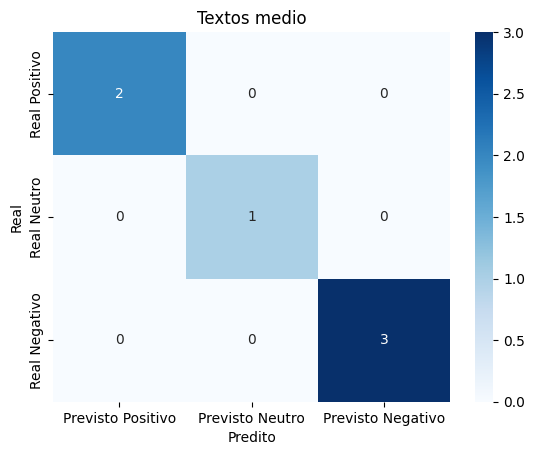

Matriz de confusão para textos curto: 
[[ 7  0  1]
 [ 2 10  0]
 [ 0  0  9]]


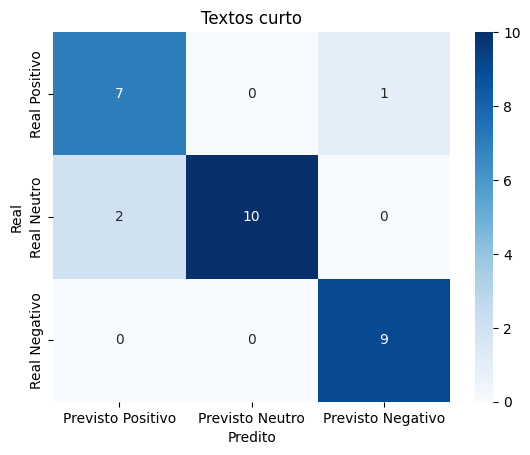

Matriz de confusão para textos longo: 
[[3 0 0]
 [0 3 0]
 [0 0 3]]


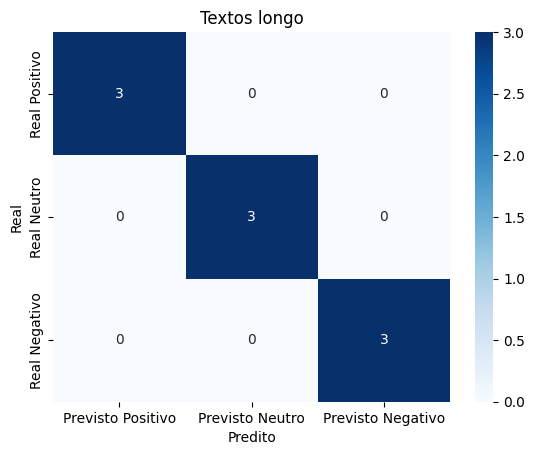

In [10]:
for cat in df["len_category"].unique():
    subset = df[df["len_category"] == cat]
    if not subset.empty:
        print(f"Matriz de confusão para textos {cat}: ")
        print(confusion_matrix(subset["label"], subset["pred"]))
        sns.heatmap(
            confusion_matrix(
                subset["label"],
                subset["pred"]
            ),
            annot=True, fmt="d",cmap="Blues",
            xticklabels=["Previsto Positivo", "Previsto Neutro", "Previsto Negativo"],
            yticklabels=["Real Positivo", "Real Neutro", "Real Negativo"],
        )
        plt.title(f"Textos {cat}")
        plt.xlabel("Predito")
        plt.ylabel("Real")
        plt.show()